In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
data.groupby('ocean_proximity').median_house_value.mean().sort_values()

ocean_proximity
INLAND        124896.863147
<1H OCEAN     240267.990812
NEAR OCEAN    249042.355023
NEAR BAY      259279.292070
ISLAND        380440.000000
Name: median_house_value, dtype: float64

In [12]:
data = pd.get_dummies(data)

In [13]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [14]:
X = data.drop(['median_house_value'],axis=1)
y = data.median_house_value

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
print(f'X_train shape: {X_train.shape} and X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape} and y_test shape: {y_test.shape}')

X_train shape: (16346, 13) and X_test shape: (4087, 13)
y_train shape: (16346,) and y_test shape: (4087,)


In [22]:
train_data = X_train.join(y_train)

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,0,0,0,1,0,489600.0
2117,-119.73,36.76,30.0,1548.0,282.0,886.0,311.0,3.1000,0,1,0,0,0,71300.0
18861,-122.19,38.13,5.0,7854.0,1446.0,4361.0,1395.0,4.9504,0,0,0,1,0,214800.0
6855,-118.15,34.06,28.0,3855.0,922.0,2517.0,874.0,3.5050,1,0,0,0,0,204300.0
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,1,0,0,0,0,500001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,1,0,0,0,0,190300.0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,0,0,0,0,1,125800.0
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,1,0,0,0,0,500001.0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,0,1,0,0,0,91200.0


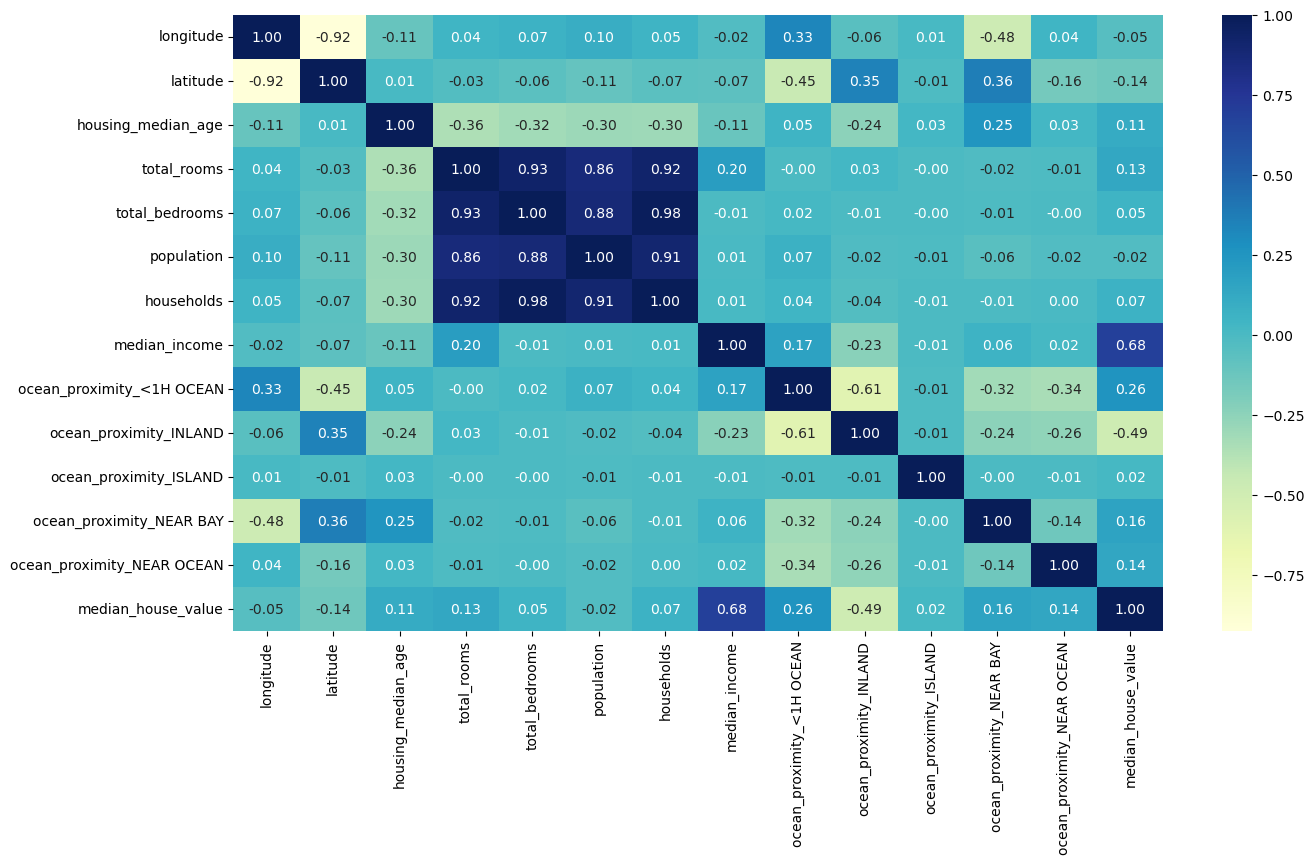

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True,fmt='.2f')
plt.show()

In [25]:
train_data['bedroom_ratio'] = train_data.total_bedrooms/train_data.total_rooms
train_data['rooms_per_hosehold'] = train_data.total_rooms/train_data.households

In [26]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,bedroom_ratio,rooms_per_hosehold
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,0,0,0,1,0,489600.0,0.240130,4.690632
2117,-119.73,36.76,30.0,1548.0,282.0,886.0,311.0,3.1000,0,1,0,0,0,71300.0,0.182171,4.977492
18861,-122.19,38.13,5.0,7854.0,1446.0,4361.0,1395.0,4.9504,0,0,0,1,0,214800.0,0.184110,5.630108
6855,-118.15,34.06,28.0,3855.0,922.0,2517.0,874.0,3.5050,1,0,0,0,0,204300.0,0.239170,4.410755
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,1,0,0,0,0,500001.0,0.171294,5.550820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,1,0,0,0,0,190300.0,0.198787,5.030508
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,0,0,0,0,1,125800.0,0.165321,6.048843
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,1,0,0,0,0,500001.0,0.117333,10.344828
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,0,1,0,0,0,91200.0,0.197685,5.301824


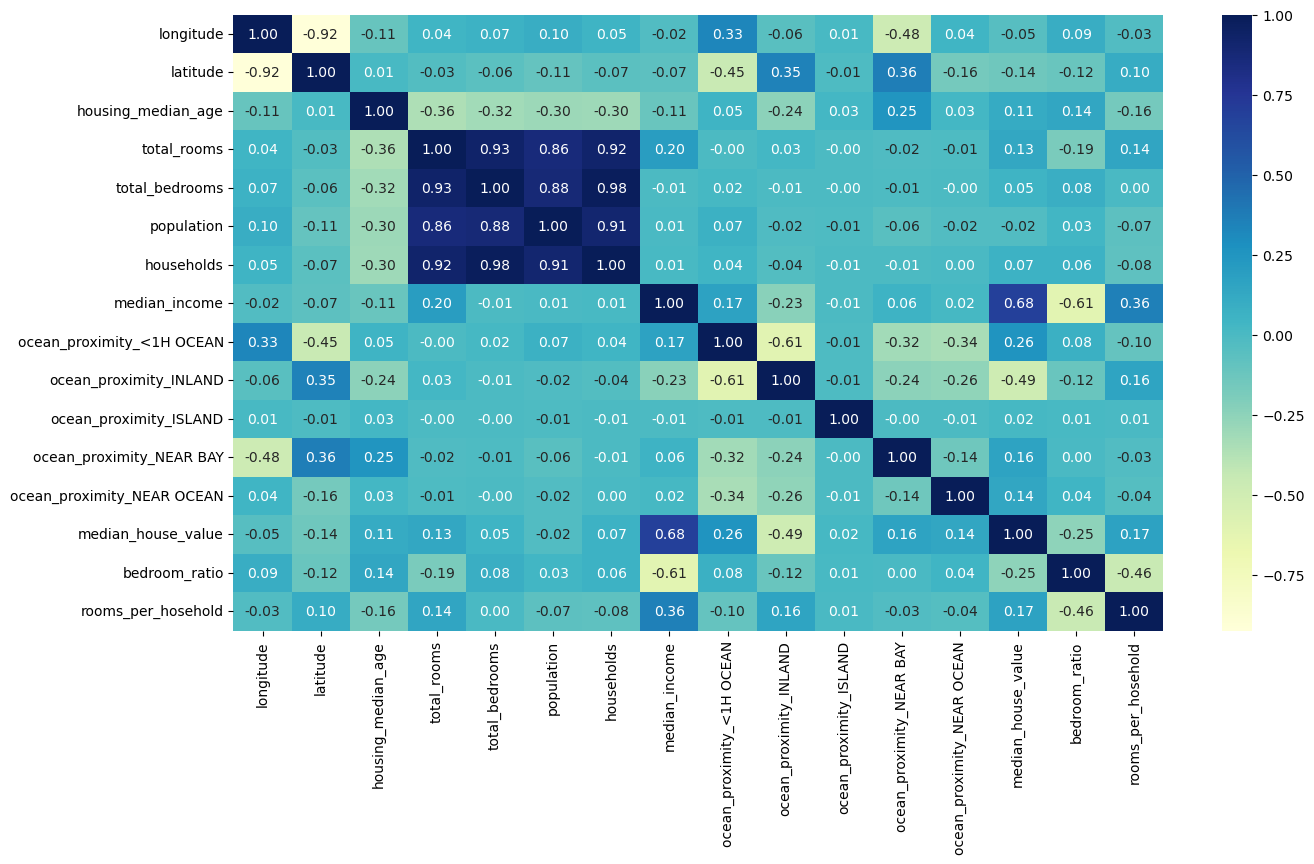

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True,fmt='.2f')
plt.show()

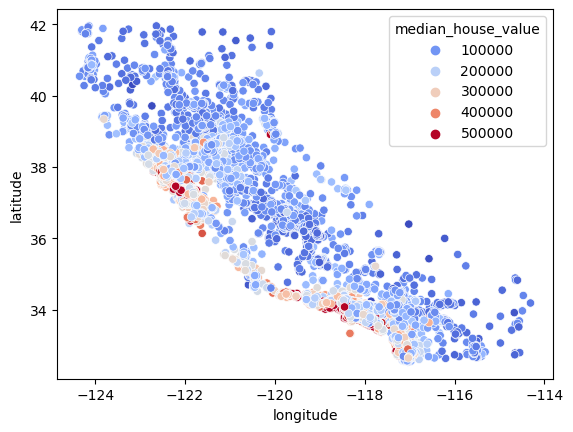

In [28]:
sns.scatterplot(y=train_data.latitude,x=train_data.longitude,hue=train_data.median_house_value,palette='coolwarm')
plt.show()

In [31]:
scaler = StandardScaler()

X_train = train_data.drop(['median_house_value'],axis=1)
y_train = train_data.median_house_value

X_train_scaled = scaler.fit_transform(X_train)

# Linear Regression Model

In [32]:
regr = LinearRegression()

regr.fit(X_train_scaled,y_train)

LinearRegression()

In [47]:
test_data = X_test.join(y_test)

test_data['bedroom_ratio'] = test_data.total_bedrooms/test_data.total_rooms
test_data['rooms_per_hosehold'] = test_data.total_rooms/test_data.households

X_test = test_data.drop(['median_house_value'],axis=1)
y_test = test_data.median_house_value

X_test_scaled = scaler.transform(X_test)

In [50]:
regr.score(X_test_scaled,y_test)

0.6616707482132205

In [51]:
regr.score(X_train_scaled,y_train)

0.6518882074054787

# Random Forest Model

In [52]:
forest = RandomForestRegressor()

In [53]:
param_grid={'n_estimators':[3,10,20,30,50,100,125,150,200],'max_features':[2,4,6,8,9,10],'min_samples_split':[2,4,6,8,10,20]}
grid_search = GridSearchCV(forest,param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8, 9, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 20],
                         'n_estimators': [3, 10, 20, 30, 50, 100, 125, 150,
                                          200]},
             return_train_score=True)

In [54]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, min_samples_split=4, n_estimators=200)

In [55]:
grid_search.best_estimator_.score(X_test_scaled,y_test)

0.8301029717190953

In [56]:
grid_search.best_estimator_.score(X_train_scaled,y_train)

0.9686603945331389

# XGBoost Model

In [57]:
xgb = XGBRegressor()

In [58]:
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
xgb.score(X_train_scaled,y_train)

0.94284764388892

In [60]:
xgb.score(X_test_scaled,y_test)

0.8311294399953462